# TEA graphes et complexité

Nom étudiant 1 : Sartre Anthonin

Nom étudiant 2 : Blanchard Baptiste

<b>Remarques générales :</b>
- Les salles de TP PCM SC6 et SC7 sont réservées pour un travail en autonomie (vérifiez d'éventuelles modifications d'emploi du temps). Votre présence dans ces salles n’est pas obligatoire. Si les salles ne sont pas suffisament utilisées on n'en gardera qu'une.
- Un forum de discussion est mis à disposition pour toute question/précision. Un enseignant est disponible pendant toutes les séances mais pas forcément dans la salle : si besoin il peut venir sinon il répondra sur le forum dans un délai très rapide. Hors séances les réponses sur le forum peuvent prendre plus de temps.
- Ce TEA est à réaliser en <b>binôme</b>. Si vous travaillez à 3 la notation sera plus stricte.

- Vous devez faire 3 dépots de ce fichier en le renommant etudiant1-etudiant2-depotx.ipynb (en remplaçant étudiant1 et 2 par vos noms de famille et x par 1, 2 ou 3). Pour chaque dépôt vous devrez compléter le fichier un peu plus.
- Les dates de rendu sont les suivantes : partie 1 = 4 octobre, partie 2 = 11 octobre, partie 3 et compléments = 25 octobre.
- Les questions marquées <b>complémentaire</b> doivent être rendues dans le dernier dépôt (on ne les regardera pas avant le dernier dépôt).

- Si vous oubliez un dépôt, si le fichier est compressé, mal nommé, si vous travaillez à plus de 3, si vous plagiez des documents sur Internet sans citer vos sources, etc. => 0 sur le dépôt correspondant + sanctions éventuelles.

## Partie 1 : Algorithme de Disjktra - <font color="red">Rendu le 4 octobre</font>

On considère l'algorithme de Dijkstra dont le pseudo-code est donné ci-dessous (en cas de doute vérifiez le pseudo-code sur une source fiable) :

Créez plusieurs graphes (chacun avec 5 à 10 sommets) permettant de représenter différentes situations (graphe non connexe, arêtes multiples, boucles, graphes ayant plusieurs plus courts chemins, etc.). Ces graphes seront utilisés pour tester vos algorithmes. Attention Dijkstra utilise des graphes pondérés.

In [1]:
%matplotlib inline
import pandas as pd
from networkx import nx
import warnings
from IPython.display import display
import matplotlib.pyplot as plt
import re

warnings.filterwarnings('ignore')

GrapheNonConnexte = [(1,2,6),(1,3,2),(3,4,1),(3,5,7),(3,6,9),(1,4,3),(1,8,3),(7,9,5)]
GrapheBoucle = [(1,2,1),(2,3,2),(3,4,3),(4,5,4),(4,4,7),(5,6,5),(6,7,6),(6,6,4)]
GrapheNormal = [(1,2,1),(1,3,5),(1,4,6),(1,5,3),(2,6,6),(2,7,5),(2,8,9)]
GraphePlusieurPlusCoursChemin = [(1,2,6),(1,3,6),(2,5,5),(2,8,5),(3,5,5),(3,10,8),(9,4,7),(9,10,7),(7,5,8),(4,6,2),(8,6,19),(4,10,15),(10,7,5),(7,6,10)]

Graph = [GrapheNonConnexte,GrapheBoucle,GrapheNormal,GraphePlusieurPlusCoursChemin]

for i in range(len(Graph)):
    G = nx.Graph()
    G.add_weighted_edges_from(Graph[i])
    Graph[i] = G

Exécutez l’algorithme de Dijkstra à la main sur un de vos graphes et donnez les valeurs des estimations du tableau T à chaque étape de l’algorithme.

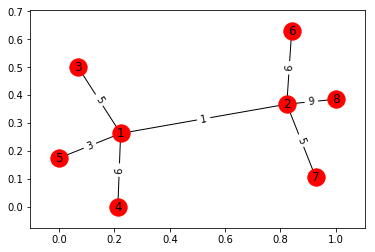

In [5]:
# Execution et explications

# test sur Graph[2] = [(1,2,1),(1,3,5),(1,4,6),(1,5,3),(2,6,6),(2,7,5),(2,8,9)]
        #T de 2 a 8 = ∞
        #T[1] = 0
        #L = S

    #tour 1
        #T = [1:0,2:∞,3:∞,4:∞,5:∞,6:∞,7:∞,8:∞]
        #T[1] est minimal
        #L = [1,2,3,4,5,6,7,8]
        #on retire le sommet 1 de L
        #valeurs de v = [2,3,4,5]
            #T[2] > T[1] +w(1,2) == ∞ > 0 + 1
                #T[2] = 1
            #T[3] > T[1] +w(1,3) == ∞ > 0 + 5
                #T[3] = 5
            #T[4] > T[1] +w(1,4) == ∞ > 0 + 6
                #T[4] = 6
            #T[5] > T[1] + w(1,5) == ∞ > 0 + 3
                #T[5] = 3

    #tour 2
        #T = [1:0,2:1,3:5,4:6,5:3,6:∞,7:∞,8:∞]
        #T[2] est minimal
        #L = [2,3,4,5,6,7,8]
        #on retire le sommet 2 de L
        #valeurs de v = [1,6,7,8]
            #T[1] > T[2] +w(2,1) == 1 > 1 + 1
            #T[6] > T[2] +w(2,6) == ∞ > 1 + 6
                #T[6] = 7
            #T[7] > T[2] +w(2,7) == ∞ > 1 + 5
                #T[7] = 6
            #T[8] > T[2] +w(2,8) == ∞ > 1 + 9
                #T[8] = 10

    #tour 3
        #T = [1:0,2:1,3:5,4:6,5:3,6:7,7:6,8:10]
        #T[5] est minimal
        #L = [3,4,5,6,7,8]
        #on retire le sommet 5 de L
        #valeurs de v = [1]
            #T[1] > T[5] +w(5,1) == 0 > 1 + 3

    #tour 4
        #T = [1:0,2:1,3:5,4:6,5:3,6:7,7:6,8:10]
        #T[3] est minimal
        #L = [3,4,6,7,8]
        #on retire le sommet 3 de L
        #valeurs de v = 1
            #T[1] > T[3] +w(3,1) == 0 > 5 + 5

    #tour 5
        #T = [1:0,2:1,3:5,4:6,5:3,6:7,7:6,8:10]
        #T[4] est minimal
        #L = [4,6,7,8]
        #on retire le sommet 4 de L
        #valeurs de v = 1
            #T[1] > T[4] +w(4,1) == 0 > 6 + 6
            
    #tour 6
        #T = [1:0,2:1,3:5,4:6,5:3,6:7,7:6,8:10]
        #T[7] est minimal
        #L = [6,7,8]
        #on retire le sommet 7 de L
        #valeurs de v = 2
            #T[2] > T[7] +w(2,7) == 1 > 6 + 5

    #tour 7
        #T = [1:0,2:1,3:5,4:6,5:3,6:7,7:6,8:10]
        #T[6] est minimal
        #L = [6,8]
        #on retire le sommet 6 de L
        #valeurs de v = 2
            #T[2] > T[6] +w(2,6) == 1 > 7 + 6

    #tour 8
        #T = [1:0,2:1,3:5,4:6,5:3,6:7,7:6,8:10]
        #T[6] est minimal
        #L = [8]
        #on retire le sommet 8 de L
        #valeurs de v = 2
            #T[2] > T[8] +w(2,8) == 1 > 10 + 9

    #tour 9
        # L est vide
        # T = [1:0,2:1,3:5,4:6,5:3,6:7,7:6,8:10]
        
drawGraph(Graph[2])

Implémentez en Python l’algorithme de Dijkstra et testez-le sur vos graphes.

In [6]:
# Implémentation de l'algorithme de Dijkstra

def dijkstra(G,u):
    T = {}
    for v in G.nodes():
        T[v] = float("inf")
    T[u] = 0
    L = dict(G.nodes(data='weight'))
    while(bool(L)==True):
        min = None
        for i in L.keys():
            if (min is None): min = i
            if ((T[i] <= T[min])): min = i
        del L[min]
        for i in (G.neighbors(min)):
            if(T[i]>(T[min]+G[min][i]['weight'])):
                T[i] = T[min] + G[min][i]['weight']
    return T

In [7]:
# Tests de l'algorithme de Dijkstra
for i in Graph:
    display(drawDijkstra(i,6))

,1,2,3,4,5,6,7,8,9
Iteration 2,inf,inf,9,inf,inf,0,inf,inf,inf
Iteration 3,11.0,inf,9,inf,inf,0,inf,inf,inf
Iteration 4,11.0,inf,9,10.0,inf,0,inf,inf,inf
Iteration 5,11.0,inf,9,10.0,16.0,0,inf,inf,inf
Iteration 6,11.0,17.0,9,10.0,16.0,0,inf,inf,inf
Iteration 7,11.0,17.0,9,10.0,16.0,0,inf,14.0,inf


,1,2,3,4,5,6,7
Iteration 2,inf,inf,inf,inf,5,0,inf
Iteration 3,inf,inf,inf,inf,5,0,6.0
Iteration 4,inf,inf,inf,9.0,5,0,6.0
Iteration 5,inf,inf,12.0,9.0,5,0,6.0
Iteration 6,inf,14.0,12.0,9.0,5,0,6.0
Iteration 7,15.0,14.0,12.0,9.0,5,0,6.0


,1,2,3,4,5,6,7,8
Iteration 2,inf,6,inf,inf,inf,0,inf,inf
Iteration 3,7.0,6,inf,inf,inf,0,inf,inf
Iteration 4,7.0,6,inf,inf,inf,0,11.0,inf
Iteration 5,7.0,6,inf,inf,inf,0,11.0,15.0
Iteration 6,7.0,6,12.0,inf,inf,0,11.0,15.0
Iteration 7,7.0,6,12.0,13.0,inf,0,11.0,15.0
Iteration 8,7.0,6,12.0,13.0,10.0,0,11.0,15.0


,1,2,3,4,5,6,7,8,9,10
Iteration 2,inf,inf,inf,2,inf,0,inf,inf,inf,inf
Iteration 3,inf,inf,inf,2,inf,0,inf,19.0,inf,inf
Iteration 4,inf,inf,inf,2,inf,0,10.0,19.0,inf,inf
Iteration 5,inf,inf,inf,2,inf,0,10.0,19.0,9.0,inf
Iteration 6,inf,inf,inf,2,inf,0,10.0,19.0,9.0,17.0
Iteration 7,inf,inf,inf,2,inf,0,10.0,19.0,9.0,16.0
Iteration 8,inf,inf,inf,2,18.0,0,10.0,19.0,9.0,16.0
Iteration 9,inf,inf,inf,2,18.0,0,10.0,19.0,9.0,15.0
Iteration 10,inf,inf,23.0,2,18.0,0,10.0,19.0,9.0,15.0
Iteration 11,inf,23.0,23.0,2,18.0,0,10.0,19.0,9.0,15.0


Proposez une modification de l’algorithme permettant de calculer le plus court chemin entre deux sommets u et v du graphe. Ecrivez cet algorithme en pseudo-code, puis implémentez-le et testez-le.

In [8]:
# Pseudo-code de la version étendue et justifications si nécessaire

#Entrée : un graphe pondéré G=(S,A,w), un sommet origine u et et le sommet cible v
#Sortie : Un tableau contenant le chemin le plus court reliant u et v

#Initialiser un tableau T d’estimation des plus courts chemins
#Initialiser un tableau prev des sommets avec le plus court chemin parcouru
#Pour chaque sommet i de G
    #T[i] = ∞
    #Prev[i] = None
#T[u] = 0
#Initialiser le container L des sommets à traiter avec l’ensemble S
#Tant que L n’est pas vide
    #Extraire de L le sommet u tel que T[u] est minimal dans min
    #Si T[min] = T[v]
        #Si (prev[v] == None)
            #retourner None // Il n'existe pas de chemin'
        #Initialiser un tableau S du plus court chemin entre u et v
        #Tant que v est différent de None
            #insérer v au au début de S
            #v = prev[v]
        #retouner l'inverse de S // Pour remettre le chemin dans le bon sens
    #Pour chaque voisin i de G
    #si (T(i) > T(min) + w(i,min))
        #T(i) = T(min) + w(i,min)
        #prev[i] = min
#Retourner T

#Source: https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm#Pseudocode

In [9]:
# Implémentation de l'algorithme de Dijkstra étendu

def dijkstra2(G, u, v):
    T = {}
    S = []
    prev = {}
    for i in G.nodes():
        T[i] = float("inf")
        prev[i] = None
    T[u] = 0
    L = dict(G.nodes(data='weight'))
    while(bool(L)==True):
        min = None
        for i in L.keys():
            if (min is None): min = i
            if ((T[i] <= T[min])): min = i
        del L[min]
        for i in (G.neighbors(min)):
            if(T[i]>(T[min]+G[min][i]['weight'])):
                T[i] = T[min] + G[min][i]['weight']
                prev[i] = min
        if(T[min] == T[v]):
            if(prev[v] == None):
                print("Le chemin n'existe pas")
                return S.append(v)
            while(v != None):
                S.append(v)
                v = prev[v]
            return S[::-1]
    return T

Le chemin n'existe pas


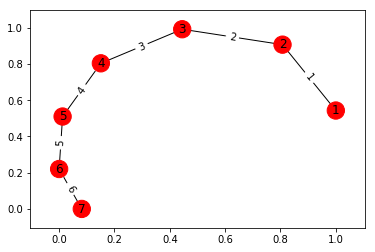

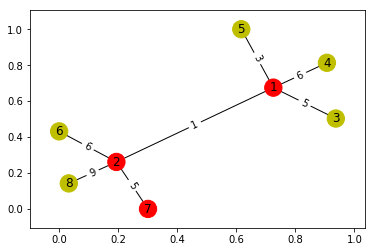

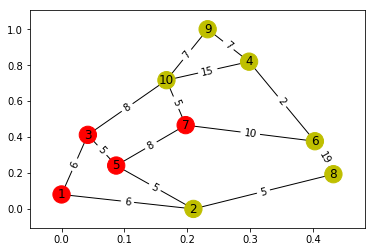

In [10]:
# Tests de l'algorithme de Dijkstra étendu
for i in Graph:
    drawResultGraph(i,1,7)

Proposez et testez des fonctions pour
- visualiser le graphe
- visualiser le chemin obtenu
- visualiser la manière dont le graphe est exploré par l'algorithme

In [11]:
# Visualisation du graphe

def drawGraph(G):
    pos=nx.spring_layout(G)
    labels = nx.get_edge_attributes(G,'weight')
    
    nx.draw_networkx(G, pos)
    nx.draw_networkx_edge_labels(G, pos, edge_labels = labels)
    
    plt.show()
    
# La fonction est exécutée plus haut

In [12]:
# Visualisation du résultat

def drawResultGraph(G,a,b):
    chemin = dijkstra2(G, a, b)
    
    if (chemin == None):
        return None
    
    node_colors = ["r" if n in chemin else "y" for n in G.nodes()]
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G,'weight')
    
    nx.draw_networkx(G, pos, node_color=node_colors)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    plt.show()
# La fonction est exécutée plus haut

In [13]:
# Visualisation du fonctionnement de l'algorithme

def drawDijkstra(G,u):
    I = {}
    T = {}
    cpt = 1
    for v in G.nodes():
        T[v] = float("inf")
    T[u] = 0
    L = dict(G.nodes(data='weight'))
    while(bool(L)==True):
        min = None
        for i in L.keys():
            if (min is None): min = i
            if ((T[i] <= T[min])): min = i
        del L[min]
        for i in (G.neighbors(min)):
            if(T[i]>(T[min]+G[min][i]['weight'])):
                T[i] = T[min] + G[min][i]['weight']
                cpt = cpt + 1
                I['Iteration '+str(cpt)]= T.copy()
    return pd.DataFrame.from_dict(I,orient = 'index').sort_index(axis = 1, ascending = True)

# La fonction est exécutée plus haut

<b>Complémentaire</b> - Calculez la complexité de l’algorithme dans la version simple et la version étendue. Montrez l'impact de la structure de données L utilisée pour stocker les sommets (liste chaînée, table de hachage, arbre binaire de recherche…) sur la complexité.

In [14]:
# Calcul et justification de la complexité


In [15]:
# Arguments sur les différentes structures de données pouvant être utilisées


## Partie 2 : Plus courts chemins simples dans le métro parisien - <font color="red">Rendu le 11 octobre</font>

Vous devez ici proposer des méthodes permettant de calculer des plus courts chemins dans le métro parisien. L’objectif est que l’utilisateur puisse choisir une station de départ et une station d’arrivée et que le logiciel lui indique un plus court trajet (entre terme de distance dans le graphe) entre ces deux stations.

Le fichier <b><font color="red">metro.graph</font></b> (disponible sous moodle, format indiqué ci-dessous) contient toutes les stations et connexions entre stations dans le métro :
- Chaque sommet correspond à une station pour une ligne donnée (par exemple, République [ligne 3] et République [ligne 5] sont deux sommets différents). A chaque sommet est associé le nom de la station (chaîne de caractères) et la position de la station sur une carte (échelle : 1~25.7m).
- Un arc orienté et valué connecte deux sommets si le métro relie directement les stations correspondantes. Le graphe n'est pas symétrique à cause de quelques "sens uniques", par exemple du côté de la porte d'Auteuil. Les arcs sont valués par le temps estimé du trajet en secondes (en prenant pour base une vitesse moyenne de 10m/s, soit 36km/h).
- Deux arcs symétriques connectent deux sommets s'il est possible de passer à pied sans changer de billet entre les stations correspondantes. Ces arcs sont alors valués par une estimation du temps moyen de trajet et d'attente (120s).

Construction du graphe : vous devez implémentez les outils pour (i) lire le fichier, (ii) construire le graphe valué et orienté correspondant aux liaisons entre les stations de métro

In [16]:
# Une ou plusieurs fonctions pour lire le fichier et construire le graphe

def lireFichierLigneParLigne(chemin):
    file = open(chemin,"r",encoding="latin-1")
    texte = file.readlines()
    return texte

def sommets(texte):
    sommets = {}
    cpt = 2
    stop = False

    while(stop == False):
        x = texte[cpt]
        y = x.split(" ",1)
        sommets[y[0]]= re.sub('\n', '', y[1])
        cpt = cpt + 1
        if (texte[cpt] == "coord sommets\n"):
            stop = True 
    return sommets, cpt

def coords(texte, cpt):
    coords = {}
    stop = False

    while(stop == False):
        x = texte[cpt]
        y = x.split(" ",2)
        a = int(y[1]),int(re.sub('\n', '', y[2]))
        coords[y[0]]= a
        cpt = cpt + 1
        if (texte[cpt] == "arcs values\n"):
            stop = True 
    return coords, cpt

def arretes(texte, cpt):
    arretes = []
    stop = False

    while(stop == False):
        x = texte[cpt]
        y = x.split(" ",2)
        arretes.append((int(y[0]),int(y[1]),float(re.sub('\n', '', y[2]))))
        cpt = cpt + 1
        if (texte[cpt] == "\n"):
            stop = True 
    return arretes

def makeGraphFromFile(chemin): 
    texte = lireFichierLigneParLigne(chemin)
    s, cpt = sommets(texte)
    c, cpt = coords(texte, cpt+1)
    a = arretes(texte, cpt+1)
    G = nx.DiGraph()
    G.add_weighted_edges_from(a)
    return G,s,c,a

def drawBigGraph(G):
    cpt = 0
    pos = {}
    
    for x in c:
        pos[cpt] = c[x]
        cpt = cpt + 1 
    
    plt.figure(figsize=(20, 20), dpi=100)
    plt.axis('off')
    
    nx.draw_networkx_nodes(G,pos)
    nx.draw_networkx_edges(G,pos)

    plt.show()
    
def drawBigResultGraph(G,a,b,draw=False):
    cpt = 0
    pos = {}
    
    for x in c:
        pos[cpt] = c[x]
        cpt = cpt + 1 
        
    plt.figure(figsize=(20, 20), dpi=40)
    plt.axis('off')
    
    chemin = dijkstra2(G, a, b)
    if (chemin == None):
        return None
    
    rouge = []
    jaune = []
    
    for n in G.nodes():
        if n in chemin:
            rouge.append(n)
        else:
            jaune.append(n)
    
    nx.draw_networkx_nodes(G, pos, nodelist=jaune , node_color="y")
    nx.draw_networkx_nodes(G, pos, nodelist=rouge , node_color="r")
    nx.draw_networkx_edges(G, pos)
    
    if(draw == True):
        nx.draw_networkx_labels(G,pos)
    plt.show()
    
GraphParis,s,c,a = makeGraphFromFile("metro.graph")

#print([p for p in nx.all_shortest_paths(GraphParis,source=0,target=92)])

Exemple de calculs de plus courts chemins : montrez avec des exemples d’appels à Dijkstra et Dijkstra étendu sur le graphe du métro que tout est correct.

,0,1,2,3,4,5,6,7,8,9,...,366,367,368,369,370,371,372,373,374,375
Iteration 2,0,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
Iteration 3,0,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
Iteration 4,0,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
Iteration 5,0,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
Iteration 6,0,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Iteration 391,0,823.0,701.0,995.0,649.0,215.0,753.0,790.0,670.0,450.0,...,374.0,397.0,774.0,924.0,481.0,702.0,1368.0,990.0,802.0,650.0
Iteration 392,0,823.0,701.0,995.0,649.0,215.0,753.0,790.0,670.0,450.0,...,374.0,397.0,774.0,924.0,481.0,702.0,1368.0,990.0,802.0,650.0
Iteration 393,0,823.0,701.0,995.0,649.0,215.0,753.0,790.0,670.0,450.0,...,374.0,397.0,774.0,924.0,481.0,702.0,1368.0,990.0,802.0,650.0
Iteration 394,0,823.0,701.0,995.0,649.0,215.0,753.0,790.0,670.0,450.0,...,374.0,397.0,774.0,924.0,481.0,702.0,1368.0,990.0,802.0,650.0


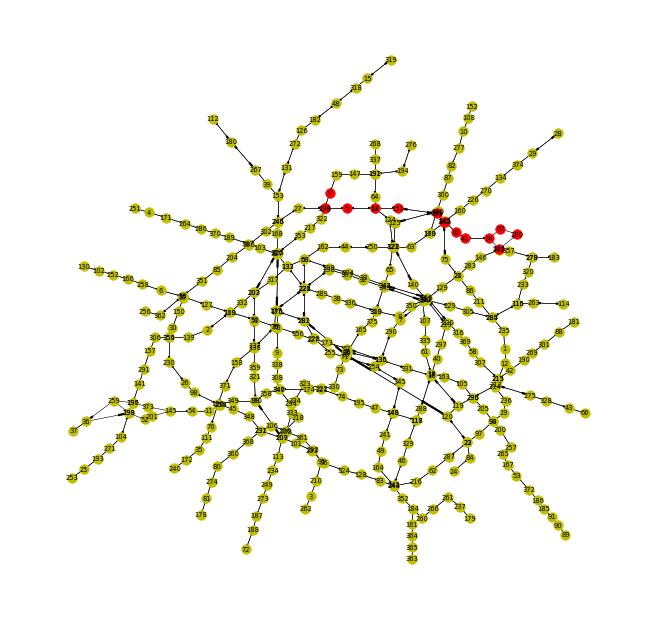

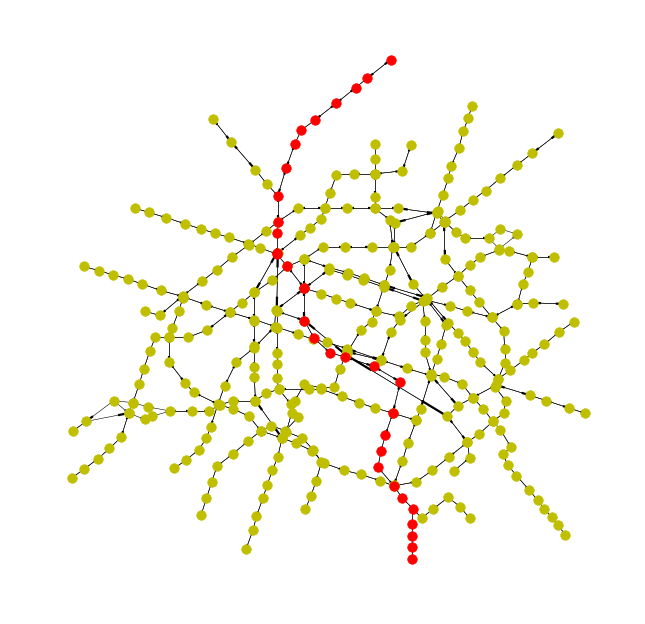

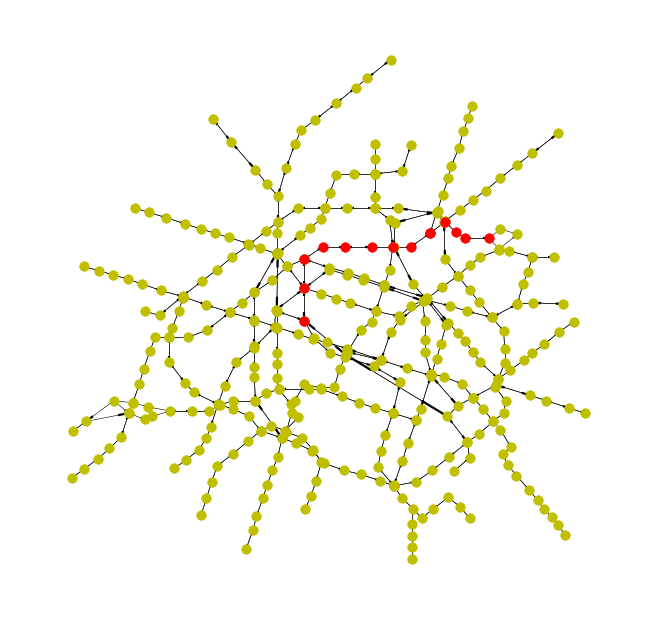

In [51]:
# Plusieurs appels à Dijkstra et Dijkstra étendu

display(drawDijkstra(GraphParis,0))
drawBigResultGraph(GraphParis,0,92,True)
drawBigResultGraph(GraphParis,319,363)
drawBigResultGraph(GraphParis,282,34)

#Pour afficher le numero des arrêts, rajouter l'argument True dans drawBigResultGraph
#drawBigResultGraph(GraphParis,0,92,True)

<b>Complémentaire</b> : Proposer une méthode de visualisation du graphe et du/des chemins qui devra prendre en compte les coordonnées géographiques.

In [ ]:
# Code pour visualiser avec prise en compte des coordonnées géographiques


## Partie 3 : Autres plus courts chemins simples dans le métro parisien - <font color="red">Rendu le 25 octobre</font>

La méthode de Dijkstra est très générale et ne prend pas du tout en compte la spécificité du métro parisien, ou encore les coordonnées géographiques des sommets.

L’objectif de cette partie est de modifier votre code pour proposer plusieurs autres notions de plus courts chemins :
-	Nombre minimal de stations traversées
-	Nombre minimal de correspondances
- Chemins à mobilité réduite (fauteuil, poussette, valise, ...)
-	Chemins alternatifs (en cas de panne ou d'influence trop forte) 
- Chemin qui se "rapproche" géographiquement de la destination
-	Etc.



Implémentez la recherche de plus courts chemins avec d'autres mesures du plus court chemin. Prenez soin de bien identifier ce qui relève de l'algorithme et ce qui relève de la construction du graphe. Par exemple s'il suffit de modifier les pondérations des arcs du graphe et d'utiliser la version de Dijkstra de la partie 1 alors vous devez proposer une fonction qui modifie les poids du graphe plutôt que de modifier l'algorithme...

In [ ]:
# Plusieurs implémentations et tests

    #Nombre minimal de stations traversées
        #==> Remplacer le poids des arrêtes par 1
    #Nombre minimal de correspondances
        #==> Remplacer le poids des arrêtes par 0 et les changement de station par 1 ?
    #Chemins alternatifs (en cas de panne ou d'influence trop forte)
        #==> K Plus Court Chemin 
    #Chemin qui se "rapproche" géographiquement de la destination
        #==>Remplacer D par la station qui minimise la distance à la destination

Proposez l'algorithme et une implémentation pour trouver au moins un chemin alternatif (par exemple le deuxième plus court ou un autre plus court s’il y en a plusieurs).

In [ ]:
# Algorithme pour trouver le 2e chemin le plus court

Definitions:

        G(V, E): weighted directed graph, with set of vertices V and set of directed edges E,
        w(u, v): cost of directed edge from node u to node v (costs are non-negative).

    Links that do not satisfy constraints on the shortest path are removed from the graph

        s: the source node
        t: the destination node
        K: the number of shortest paths to find
        Pu: a path from s to u
        B is a heap data structure containing paths
        P: set of shortest paths from s to t
        countu: number of shortest paths found to node u

Algorithm:

        P = empty
        countu = 0,for all u in V
        insert path Ps = {s} into B with cost 0
        while B is not empty and countt < K:

            – let Pu be the shortest cost path in B with cost C
            – B = B − {Pu }, countu = countu + 1
            – if u = t then P = P U {Pu}
            – if countu ≤ K then

                    for each vertex v adjacent to u:

                    – let Pv be a new path with cost C + w(u, v) formed by concatenating edge (u, v) to path Pu
                    – insert Pv into B

        return P

In [71]:
# Implémentation pour proposer le 2e (ou les k plus courts) chemin alternatif 
def dijkstra2(G, u, v):
    T = {}
    S = []
    prev = {}
    for i in G.nodes():
        T[i] = float("inf")
        prev[i] = None
    T[u] = 0
    L = dict(G.nodes(data='weight'))
    while(bool(L)==True):
        min = None
        for i in L.keys():
            if (min is None): min = i
            if ((T[i] <= T[min])): min = i
        del L[min]
        for i in (G.neighbors(min)):
            if(T[i]>(T[min]+G[min][i]['weight'])):
                T[i] = T[min] + G[min][i]['weight']
                prev[i] = min
        if(T[min] == T[v]):
            if(prev[v] == None):
                print("Le chemin n'existe pas")
                return S.append(v)
            while(v != None):
                S.append(v)
                v = prev[v]
            return S[::-1]
    return T

import heapq

def kDijkstra(G, s, t, K):
    count = {}
    P = []
    Pu = []
    B = []
    for u in G.nodes():
        count[u] = 0
    P.insert(s,0)
    heapq.heappush(B,[0,P[s]])
    while((bool(B)==True) & (count[t]<K)):
        P[min(B)[1]] = min(B)
        u = P[min(B)[1]][1]
        c = P[min(B)[1]][0]
        heapq.heappop(B)
        count[u] = count[u]+1
        print(P,Pu)
        if(u==t):
            P.append(Pu)
        if(count[u]<=K):
            for v in (G.neighbors(u)):
                P.insert(v,[c+G[u][v]["weight"],P[u].append(v)])
                print(P[v])
                heapq.heappush(B,P[v])
    return P
                
    
kDijkstra(GraphParis,0,92,2)

[[0, 0]] []


IndexError: list index out of range

<b>Complémentaire</b> : La méthode de Dijkstra est très générale et ne prend pas du temps en compte les coordonnées géographiques des sommets. Or, de manière générale quand on cherche un plus court chemin on va probablement privilégier des chemins qui nous rapprochent de la destination et ce, de manière heuristique. Pour pallier ce problème nous allons utiliser l'algorithme A\* (à vous de trouver des explications et le pseudo-code si nécessaire) qui consiste à privilégier les chemins qui vont dans la direction (géographique) de la destination.
- Proposez une implémentation de A\*
- Testez là
- Comparez le déroulement de l'algorithme avec Dijkstra.

In [ ]:
# Implémentation de A*


In [ ]:
# Tests de l'algorithme


In [ ]:
# Illustrations du résultat obtenu et comparaisons du déroulement de l'exécution avec Dijkstra


<b>Complémentaire</b> : Une autre solution consiste à démarrer Dijkstra à la fois en avant depuis la source et en arrière depuis la destination. Dès que les deux recherches se rejoignent on s'arrête.
- Justifiez pourquoi cette solution est intuitivement plus efficace qu'une exploration simple
- Implémentez cette solution
- Comparez les résultats avec Dijkstra

In [ ]:
# Justification de la pertinence de cette solution


In [ ]:
# Implémentation


In [ ]:
# Comparaison avec Dijkstra


<b>Complémentaire</b> : Quelles autres solutions pourriez-vous proposer pour améliorer encore la recherche ? On ne demande pas d'implémentation ni d'algorithme, juste des intuitions.

In [ ]:
# Idées et intuitions
